# Question Paper Difficulty Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

# Data Importing

In [2]:
dataframe = pd.read_csv("predictiondata.csv")
dataframe.head()

,CGPA:,Question.1,Question.2,Question.3,Question.4,Question.5,Overall Dificulty
0,aboveAvg,medium,easy,hard,hard,medium,MEDIUM
1,aboveAvg,easy,medium,hard,medium,easy,MEDIUM
2,aboveAvg,medium,medium,medium,hard,hard,TOUGH
3,aboveAvg,easy,hard,hard,easy,medium,MEDIUM
4,Avg,hard,hard,hard,hard,hard,TOUGH


# Data Transformation

Let's transform the data into numerical representation for easier process.

On a scale of 1-3,

Our target attribute 'Overall Dificulty' transformed into '1'->EASY, '2'->MEDIUM, '3'->TOUGH

'CGPA' attribute transformed into '1'->belowAvg, '2'->Avg, '3'->aboveAvg

All the 5 question attributes transformed into '1'->easy, '2'->medium, '3'->hard

In [3]:
dataframe = pd.read_csv("sampledata.csv")
dataframe.head()

,CGPA:,Question.1,Question.2,Question.3,Question.4,Question.5,Overall Dificulty
0,3,2,1,3,3,2,2
1,3,1,2,3,2,1,2
2,3,2,2,2,3,3,3
3,3,1,3,3,1,2,2
4,2,3,3,3,3,3,3


# Data Analysis

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CGPA:              530 non-null    int64
 1   Question.1         530 non-null    int64
 2   Question.2         530 non-null    int64
 3   Question.3         530 non-null    int64
 4   Question.4         530 non-null    int64
 5   Question.5         530 non-null    int64
 6   Overall Dificulty  530 non-null    int64
dtypes: int64(7)
memory usage: 29.1 KB


In [5]:
dataframe.describe()

,CGPA:,Question.1,Question.2,Question.3,Question.4,Question.5,Overall Dificulty
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2.211321,1.741509,1.918868,1.915094,1.950943,2.016981,2.032075
std,0.712211,0.716517,0.772289,0.771882,0.751463,0.751617,0.778315
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [6]:
dataframe.groupby('Overall Dificulty').describe()

CGPA:                                               \
                   count      mean       std  min  25%  50%  75%  max   
Overall Dificulty                                                       
1                  152.0  2.631579  0.594503  1.0  2.0  3.0  3.0  3.0   
2                  209.0  2.282297  0.666306  1.0  2.0  2.0  3.0  3.0   
3                  169.0  1.745562  0.587869  1.0  1.0  2.0  2.0  3.0   

                  Question.1            ... Question.4      Question.5  \
                       count      mean  ...        75%  max      count   
Overall Dificulty                       ...                              
1                      152.0  1.473684  ...       1.25  3.0      152.0   
2                      209.0  1.550239  ...       2.00  3.0      209.0   
3                      169.0  2.218935  ...       3.00  3.0      169.0   

                                                                
                       mean       std  min  25%  50%  75%  max  
Overall Dificulty                                               
1                  1.447368  0.606690  1.0  1.0  1.0  2.0  3.0  
2                  1.918660  0.641577  1.0  2.0  2.0  2.0  3.0  
3                  2.650888  0.478106  2.0  2.0  3.0  3.0  3.0  

[3 rows x 48 columns]

In [7]:
dataframe.groupby('CGPA:').describe()

Question.1                                              Question.2  \
           count      mean       std  min  25%  50%  75%  max      count   
CGPA:                                                                      
1           90.0  1.900000  0.750281  1.0  1.0  2.0  2.0  3.0       90.0   
2          238.0  1.857143  0.703046  1.0  1.0  2.0  2.0  3.0      238.0   
3          202.0  1.534653  0.670106  1.0  1.0  1.0  2.0  3.0      202.0   

                 ... Question.5      Overall Dificulty                      \
           mean  ...        75%  max             count      mean       std   
CGPA:            ...                                                         
1      2.300000  ...        2.0  3.0              90.0  2.522222  0.674208   
2      2.042017  ...        3.0  3.0             238.0  2.260504  0.717028   
3      1.603960  ...        2.0  3.0             202.0  1.544554  0.615306   

                                
       min  25%  50%  75%  max  
CGPA:                           
1      1.0  2.0  3.0  3.0  3.0  
2      1.0  2.0  2.0  3.0  3.0  
3      1.0  1.0  1.0  2.0  3.0  

[3 rows x 48 columns]

# Data Visualization

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

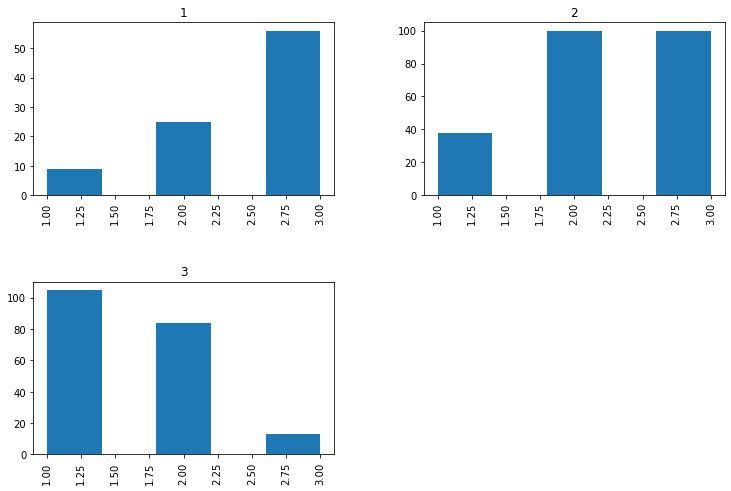

In [8]:
dataframe.hist(column='Overall Dificulty',by='CGPA:',bins=5,figsize=(12,8))

<AxesSubplot:xlabel='Overall Dificulty', ylabel='count'>

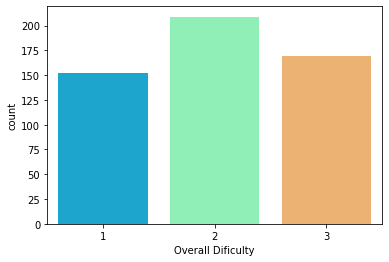

In [9]:
sns.countplot(x='Overall Dificulty',data=dataframe,palette='rainbow')

# Train test split

In [10]:
features=dataframe.drop(['Overall Dificulty'],axis=1).values

In [11]:
targets=dataframe['Overall Dificulty'].values

In [12]:
features_train, targets_train = features[0:400], targets[0:400]
features_test, targets_test = features[400:], targets[400:]

# Naive Bayes Classifier

In [13]:
model=CategoricalNB()
model.fit(features_train, targets_train)

CategoricalNB()

In [14]:
pred=model.predict(features_test)
print(pred)

[3 3 2 3 3 1 2 2 2 2 3 2 1 2 3 1 3 2 1 1 1 3 2 3 2 1 3 2 3 1 3 1 3 2 2 2 2
 1 2 3 1 3 2 3 1 2 2 2 2 3 2 2 3 3 2 1 1 1 3 3 2 3 3 1 2 2 2 2 3 2 1 2 3 1
 3 2 1 1 1 3 2 3 2 1 3 2 3 1 3 1 3 2 2 2 2 1 2 3 1 3 2 3 1 2 2 2 2 3 2 2 2
 3 2 1 1 1 2 2 2 3 3 1 2 3 2 2 2 3 2 1]


In [15]:
print(confusion_matrix(targets_test,pred))
print(classification_report(targets_test, pred))

[[30  5  0]
 [ 2 46  3]
 [ 0  6 38]]
              precision    recall  f1-score   support

           1       0.94      0.86      0.90        35
           2       0.81      0.90      0.85        51
           3       0.93      0.86      0.89        44

    accuracy                           0.88       130
   macro avg       0.89      0.87      0.88       130
weighted avg       0.88      0.88      0.88       130



In [16]:
nb_accuracy=model.score(features_test, targets_test)*100
print(nb_accuracy)

87.6923076923077


# Accuracy = 87.69%

# Random Forest Classifier

In [17]:
rf = RandomForestClassifier(n_estimators=20, random_state=100)
rf.fit(features_train, targets_train)

RandomForestClassifier(n_estimators=20, random_state=100)

In [18]:
y_pred = rf.predict(features_test)
print(y_pred)

[3 3 2 3 3 1 2 2 2 2 3 2 1 1 3 1 3 1 1 2 1 3 2 3 2 1 3 2 3 1 3 1 3 2 2 2 2
 1 1 3 1 2 2 2 1 3 3 3 2 3 2 2 2 3 2 1 1 1 3 3 2 3 3 1 2 2 2 2 3 2 1 1 3 1
 3 1 1 2 1 3 2 3 2 1 3 2 3 1 3 1 3 2 2 2 2 1 1 2 1 3 2 3 1 2 2 3 2 3 2 2 2
 3 2 1 1 1 2 3 2 3 3 1 2 3 2 2 2 3 2 1]


In [19]:
print(confusion_matrix(targets_test,y_pred))
print(classification_report(targets_test,y_pred))

[[35  0  0]
 [ 1 48  2]
 [ 0  4 40]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        35
           2       0.92      0.94      0.93        51
           3       0.95      0.91      0.93        44

    accuracy                           0.95       130
   macro avg       0.95      0.95      0.95       130
weighted avg       0.95      0.95      0.95       130



In [20]:
rf_accuracy=rf.score(features_test, targets_test)*100
print(rf_accuracy)

94.61538461538461


# Accuracy = 94.61%

# Conclusion

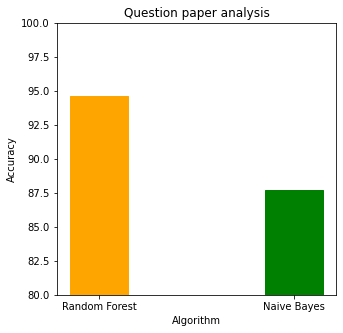

In [21]:
data = {'Random Forest' : rf_accuracy, 'Naive Bayes' : nb_accuracy}

algorithms = data.keys()
results = data.values()

fig = plt.figure(figsize = (5, 5))
barlist = plt.bar(algorithms, results, width = 0.3)
barlist[0].set_color('orange')
barlist[1].set_color('green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.ylim(80, 100)
plt.title("Question paper analysis")
plt.show()

On comparing both, we get higher accuracy on Random forest classifier(94.61%) 